In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.applications as appl
from sklearn.model_selection import train_test_split
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from tqdm import tqdm
from tensorflow.keras.utils import Sequence
from keras import callbacks  
from keras.models import load_model
from keras.utils import np_utils

In [2]:
load_path='E:/VA/onehandtwohand/128/106words_DSLR_FH/'

In [3]:
CATEGORIES=np.load(load_path+'cat_106.npy', allow_pickle=True)

In [4]:
IMG_SIZE=128

In [5]:
cat_len=len(CATEGORIES)
print(cat_len)

106


# Save combined data npy

In [6]:
# model

# model_name1 = 'InceptionResNetV2'
# model_name1 = '4layer'
model_name1 = 'efficientnetv2l_lr0.00001_106words_dslr128'
#model_name2 = 'VGG16'
# model_name1 = 'DenseNet121'
# model_name1 = 'InceptionV3'

Loading

In [7]:
X=np.load(load_path+'X_dslr.npy', allow_pickle=True)
Y=np.load(load_path+'Y_dslr.npy', allow_pickle=True)

In [8]:
X = X.astype('float32')
X /= 255


In [9]:
print('Splitting') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = cat_len)
X_train, X_new, y_train, y_new = train_test_split(X_train, y_train, test_size = 0.2, random_state = cat_len)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_new = np.array(X_new)
y_new = np.array(y_new)

print("pass")

Splitting
pass


In [10]:
del X,Y

In [11]:
print('Image Data Augmentation')
from keras.preprocessing.image import ImageDataGenerator
val_generator = ImageDataGenerator(rotation_range=0, zoom_range=0.2, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2)
#                                     , horizontal_flip=True, brightness_range=[0.6,1.3])
val_generator.fit(X_train)
val_generator.fit(X_new)
val_generator.fit(X_test)

print("done")

Image Data Augmentation
done


In [12]:
# case 1: pretrained without weight ............... retraining architechture

model_name = 'EfficientNetV2L'


exec('from tensorflow.keras.applications import '+ model_name)


## case 1:
exec('MODEL = '+model_name+'(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=True, weights=None, classes = cat_len)')
for layers in MODEL.layers: 
    layers.trainable=True
    
model1=MODEL
model1.summary()

Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 64, 64, 32)   864         ['rescaling[0][0]']              
                                                                                                  
 stem_bn (BatchNormalization)   (None, 64, 64, 32)   128         ['stem_conv[0][0]'

                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 32, 32, 256)  1024       ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 32, 32, 256)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_project_conv (Conv2D)  (None, 32, 32, 64)   16384       ['block2b_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2b_p

 block2f_project_conv (Conv2D)  (None, 32, 32, 64)   16384       ['block2f_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2f_project_bn (BatchNorma  (None, 32, 32, 64)  256         ['block2f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2f_drop (Dropout)         (None, 32, 32, 64)   0           ['block2f_project_bn[0][0]']     
                                                                                                  
 block2f_add (Add)              (None, 32, 32, 64)   0           ['block2f_drop[0][0]',           
                                                                  'block2e_add[0][0]']            
          

                                                                                                  
 block3d_expand_bn (BatchNormal  (None, 16, 16, 384)  1536       ['block3d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3d_expand_activation (Act  (None, 16, 16, 384)  0          ['block3d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3d_project_conv (Conv2D)  (None, 16, 16, 96)   36864       ['block3d_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3d_p

 block4a_dwconv2 (DepthwiseConv  (None, 8, 8, 384)   3456        ['block4a_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4a_bn (BatchNormalization  (None, 8, 8, 384)   1536        ['block4a_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4a_activation (Activation  (None, 8, 8, 384)   0           ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 384)         0           ['block4a_activation[0][0]']     
 agePoolin

 agePooling2D)                                                                                    
                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4c_se_reshape[0][0]']     
                                                                                                  
 block4c_se_expand (Conv2D)     (None, 1, 1, 768)    37632       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 8, 8, 768)    0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
          

                                                                                                  
 block4e_se_expand (Conv2D)     (None, 1, 1, 768)    37632       ['block4e_se_reduce[0][0]']      
                                                                                                  
 block4e_se_excite (Multiply)   (None, 8, 8, 768)    0           ['block4e_activation[0][0]',     
                                                                  'block4e_se_expand[0][0]']      
                                                                                                  
 block4e_project_conv (Conv2D)  (None, 8, 8, 192)    147456      ['block4e_se_excite[0][0]']      
                                                                                                  
 block4e_project_bn (BatchNorma  (None, 8, 8, 192)   768         ['block4e_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block4g_project_conv (Conv2D)  (None, 8, 8, 192)    147456      ['block4g_se_excite[0][0]']      
                                                                                                  
 block4g_project_bn (BatchNorma  (None, 8, 8, 192)   768         ['block4g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4g_drop (Dropout)         (None, 8, 8, 192)    0           ['block4g_project_bn[0][0]']     
                                                                                                  
 block4g_add (Add)              (None, 8, 8, 192)    0           ['block4g_drop[0][0]',           
                                                                  'block4f_add[0][0]']            
          

                                                                                                  
 block4i_drop (Dropout)         (None, 8, 8, 192)    0           ['block4i_project_bn[0][0]']     
                                                                                                  
 block4i_add (Add)              (None, 8, 8, 192)    0           ['block4i_drop[0][0]',           
                                                                  'block4h_add[0][0]']            
                                                                                                  
 block4j_expand_conv (Conv2D)   (None, 8, 8, 768)    147456      ['block4i_add[0][0]']            
                                                                                                  
 block4j_expand_bn (BatchNormal  (None, 8, 8, 768)   3072        ['block4j_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block5b_expand_activation (Act  (None, 8, 8, 1344)  0           ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5b_dwconv2 (DepthwiseConv  (None, 8, 8, 1344)  12096       ['block5b_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5b_bn (BatchNormalization  (None, 8, 8, 1344)  5376        ['block5b_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5b_a

 2D)                                                             ']                               
                                                                                                  
 block5d_bn (BatchNormalization  (None, 8, 8, 1344)  5376        ['block5d_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5d_activation (Activation  (None, 8, 8, 1344)  0           ['block5d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5d_se_squeeze (GlobalAver  (None, 1344)        0           ['block5d_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5f_activation (Activation  (None, 8, 8, 1344)  0           ['block5f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5f_se_squeeze (GlobalAver  (None, 1344)        0           ['block5f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5f_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5f_se_squeeze[0][0]']     
                                                                                                  
 block5f_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5f_se_reshape[0][0]']     
                                                                                                  
 block5f_s

                                                                                                  
 block5h_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5h_se_squeeze[0][0]']     
                                                                                                  
 block5h_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5h_se_reshape[0][0]']     
                                                                                                  
 block5h_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5h_se_reduce[0][0]']      
                                                                                                  
 block5h_se_excite (Multiply)   (None, 8, 8, 1344)   0           ['block5h_activation[0][0]',     
                                                                  'block5h_se_expand[0][0]']      
                                                                                                  
 block5h_p

 block5j_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5j_se_reduce[0][0]']      
                                                                                                  
 block5j_se_excite (Multiply)   (None, 8, 8, 1344)   0           ['block5j_activation[0][0]',     
                                                                  'block5j_se_expand[0][0]']      
                                                                                                  
 block5j_project_conv (Conv2D)  (None, 8, 8, 224)    301056      ['block5j_se_excite[0][0]']      
                                                                                                  
 block5j_project_bn (BatchNorma  (None, 8, 8, 224)   896         ['block5j_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5j_d

 block5l_project_conv (Conv2D)  (None, 8, 8, 224)    301056      ['block5l_se_excite[0][0]']      
                                                                                                  
 block5l_project_bn (BatchNorma  (None, 8, 8, 224)   896         ['block5l_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5l_drop (Dropout)         (None, 8, 8, 224)    0           ['block5l_project_bn[0][0]']     
                                                                                                  
 block5l_add (Add)              (None, 8, 8, 224)    0           ['block5l_drop[0][0]',           
                                                                  'block5k_add[0][0]']            
                                                                                                  
 block5m_e

 block5n_drop (Dropout)         (None, 8, 8, 224)    0           ['block5n_project_bn[0][0]']     
                                                                                                  
 block5n_add (Add)              (None, 8, 8, 224)    0           ['block5n_drop[0][0]',           
                                                                  'block5m_add[0][0]']            
                                                                                                  
 block5o_expand_conv (Conv2D)   (None, 8, 8, 1344)   301056      ['block5n_add[0][0]']            
                                                                                                  
 block5o_expand_bn (BatchNormal  (None, 8, 8, 1344)  5376        ['block5o_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5o_e

 block5q_expand_conv (Conv2D)   (None, 8, 8, 1344)   301056      ['block5p_add[0][0]']            
                                                                                                  
 block5q_expand_bn (BatchNormal  (None, 8, 8, 1344)  5376        ['block5q_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5q_expand_activation (Act  (None, 8, 8, 1344)  0           ['block5q_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5q_dwconv2 (DepthwiseConv  (None, 8, 8, 1344)  12096       ['block5q_expand_activation[0][0]
 2D)                                                             ']                               
          

 block5s_expand_activation (Act  (None, 8, 8, 1344)  0           ['block5s_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5s_dwconv2 (DepthwiseConv  (None, 8, 8, 1344)  12096       ['block5s_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5s_bn (BatchNormalization  (None, 8, 8, 1344)  5376        ['block5s_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5s_activation (Activation  (None, 8, 8, 1344)  0           ['block5s_bn[0][0]']             
 )        

 )                                                                                                
                                                                                                  
 block6b_se_squeeze (GlobalAver  (None, 2304)        0           ['block6b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6b_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6b_se_squeeze[0][0]']     
                                                                                                  
 block6b_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6b_se_reshape[0][0]']     
                                                                                                  
 block6b_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6b_se_reduce[0][0]']      
          

 block6d_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6d_se_squeeze[0][0]']     
                                                                                                  
 block6d_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6d_se_reshape[0][0]']     
                                                                                                  
 block6d_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6d_se_reduce[0][0]']      
                                                                                                  
 block6d_se_excite (Multiply)   (None, 4, 4, 2304)   0           ['block6d_activation[0][0]',     
                                                                  'block6d_se_expand[0][0]']      
                                                                                                  
 block6d_project_conv (Conv2D)  (None, 4, 4, 384)    884736      ['block6d_se_excite[0][0]']      
          

                                                                                                  
 block6f_se_excite (Multiply)   (None, 4, 4, 2304)   0           ['block6f_activation[0][0]',     
                                                                  'block6f_se_expand[0][0]']      
                                                                                                  
 block6f_project_conv (Conv2D)  (None, 4, 4, 384)    884736      ['block6f_se_excite[0][0]']      
                                                                                                  
 block6f_project_bn (BatchNorma  (None, 4, 4, 384)   1536        ['block6f_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6f_drop (Dropout)         (None, 4, 4, 384)    0           ['block6f_project_bn[0][0]']     
          

                                                                                                  
 block6h_project_bn (BatchNorma  (None, 4, 4, 384)   1536        ['block6h_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6h_drop (Dropout)         (None, 4, 4, 384)    0           ['block6h_project_bn[0][0]']     
                                                                                                  
 block6h_add (Add)              (None, 4, 4, 384)    0           ['block6h_drop[0][0]',           
                                                                  'block6g_add[0][0]']            
                                                                                                  
 block6i_expand_conv (Conv2D)   (None, 4, 4, 2304)   884736      ['block6h_add[0][0]']            
          

                                                                                                  
 block6j_add (Add)              (None, 4, 4, 384)    0           ['block6j_drop[0][0]',           
                                                                  'block6i_add[0][0]']            
                                                                                                  
 block6k_expand_conv (Conv2D)   (None, 4, 4, 2304)   884736      ['block6j_add[0][0]']            
                                                                                                  
 block6k_expand_bn (BatchNormal  (None, 4, 4, 2304)  9216        ['block6k_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6k_expand_activation (Act  (None, 4, 4, 2304)  0           ['block6k_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block6m_expand_bn (BatchNormal  (None, 4, 4, 2304)  9216        ['block6m_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6m_expand_activation (Act  (None, 4, 4, 2304)  0           ['block6m_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6m_dwconv2 (DepthwiseConv  (None, 4, 4, 2304)  20736       ['block6m_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6m_b

 ivation)                                                                                         
                                                                                                  
 block6o_dwconv2 (DepthwiseConv  (None, 4, 4, 2304)  20736       ['block6o_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6o_bn (BatchNormalization  (None, 4, 4, 2304)  9216        ['block6o_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6o_activation (Activation  (None, 4, 4, 2304)  0           ['block6o_bn[0][0]']             
 )                                                                                                
          

 block6q_bn (BatchNormalization  (None, 4, 4, 2304)  9216        ['block6q_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6q_activation (Activation  (None, 4, 4, 2304)  0           ['block6q_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6q_se_squeeze (GlobalAver  (None, 2304)        0           ['block6q_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6q_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6q_se_squeeze[0][0]']     
          

                                                                                                  
 block6s_se_squeeze (GlobalAver  (None, 2304)        0           ['block6s_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6s_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6s_se_squeeze[0][0]']     
                                                                                                  
 block6s_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6s_se_reshape[0][0]']     
                                                                                                  
 block6s_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6s_se_reduce[0][0]']      
                                                                                                  
 block6s_s

                                                                                                  
 block6u_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6u_se_reshape[0][0]']     
                                                                                                  
 block6u_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6u_se_reduce[0][0]']      
                                                                                                  
 block6u_se_excite (Multiply)   (None, 4, 4, 2304)   0           ['block6u_activation[0][0]',     
                                                                  'block6u_se_expand[0][0]']      
                                                                                                  
 block6u_project_conv (Conv2D)  (None, 4, 4, 384)    884736      ['block6u_se_excite[0][0]']      
                                                                                                  
 block6u_p

 block6w_se_excite (Multiply)   (None, 4, 4, 2304)   0           ['block6w_activation[0][0]',     
                                                                  'block6w_se_expand[0][0]']      
                                                                                                  
 block6w_project_conv (Conv2D)  (None, 4, 4, 384)    884736      ['block6w_se_excite[0][0]']      
                                                                                                  
 block6w_project_bn (BatchNorma  (None, 4, 4, 384)   1536        ['block6w_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6w_drop (Dropout)         (None, 4, 4, 384)    0           ['block6w_project_bn[0][0]']     
                                                                                                  
 block6w_a

 block6y_project_bn (BatchNorma  (None, 4, 4, 384)   1536        ['block6y_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6y_drop (Dropout)         (None, 4, 4, 384)    0           ['block6y_project_bn[0][0]']     
                                                                                                  
 block6y_add (Add)              (None, 4, 4, 384)    0           ['block6y_drop[0][0]',           
                                                                  'block6x_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 4, 4, 2304)   884736      ['block6y_add[0][0]']            
                                                                                                  
 block7a_e

 block7c_expand_bn (BatchNormal  (None, 4, 4, 3840)  15360       ['block7c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7c_expand_activation (Act  (None, 4, 4, 3840)  0           ['block7c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7c_dwconv2 (DepthwiseConv  (None, 4, 4, 3840)  34560       ['block7c_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block7c_bn (BatchNormalization  (None, 4, 4, 3840)  15360       ['block7c_dwconv2[0][0]']        
 )        

                                                                                                  
 block7e_dwconv2 (DepthwiseConv  (None, 4, 4, 3840)  34560       ['block7e_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block7e_bn (BatchNormalization  (None, 4, 4, 3840)  15360       ['block7e_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block7e_activation (Activation  (None, 4, 4, 3840)  0           ['block7e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block7e_s

 )                                                                                                
                                                                                                  
 block7g_activation (Activation  (None, 4, 4, 3840)  0           ['block7g_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block7g_se_squeeze (GlobalAver  (None, 3840)        0           ['block7g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7g_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7g_se_squeeze[0][0]']     
                                                                                                  
 block7g_s

In [13]:
print('Training model 1')
opt = Adam(learning_rate=0.00001)
earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience = 10, restore_best_weights = True)
model1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
# model1.summary()



history_const = model1.fit(X_train, y_train,batch_size=50, epochs = 1000, validation_data=(X_test,y_test),
                   callbacks= [earlystopping])


Training model 1
Epoch 1/1000
487/487 [==============================] - 180s 314ms/step - loss: 4.8299 - accuracy: 0.0089 - val_loss: 4.6514 - val_accuracy: 0.0092
Epoch 2/1000
487/487 [==============================] - 148s 304ms/step - loss: 4.7645 - accuracy: 0.0117 - val_loss: 4.6285 - val_accuracy: 0.0092
Epoch 3/1000
487/487 [==============================] - 148s 305ms/step - loss: 4.7316 - accuracy: 0.0114 - val_loss: 4.6097 - val_accuracy: 0.0107
Epoch 4/1000
487/487 [==============================] - 148s 305ms/step - loss: 4.6990 - accuracy: 0.0125 - val_loss: 4.5956 - val_accuracy: 0.0092
Epoch 5/1000
 26/487 [>.............................] - ETA: 2:01 - loss: 4.6735 - accuracy: 0.0108

KeyboardInterrupt: 

In [16]:
print('Saving')
np.save(load_path+model_name1+'_history.npy',history_const.history)
model1.save(load_path+model_name1+'_model.h5') 
print("saved")

Saving
saved


In [ ]:
# # #load saved history
# history_const=np.load(load_path+model_name1+'_history.npy',allow_pickle='TRUE').item()

# # #load saved model
# model1=load_model(load_path+model_name1+'_model.h5')

# print("loaded")

Plots


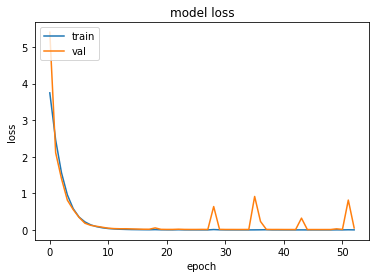

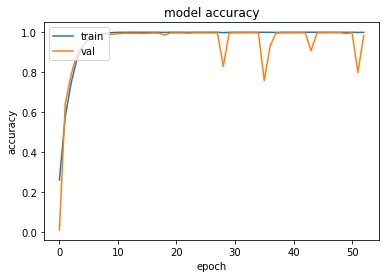

In [17]:
print('Plots')
plt.plot(history_const.history['loss'])
plt.plot(history_const.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('F:/VA/onehandtwohand/26words_DSLR_results/'+model_name1+'_loss.png')
plt.savefig(load_path+model_name1+'_loss.png')
plt.show()
plt.plot(history_const.history['accuracy'])
plt.plot(history_const.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(load_path+model_name1+'_accuracy.png')
plt.show()

In [ ]:
print('Confusion matrix')
Y_pred = model1.predict(X_new)
y_pred = np.argmax(Y_pred, axis=1)
y_test1 = np.argmax(y_new, axis=1)

cm=metrics.confusion_matrix(y_test1, y_pred)


cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
a4_dims = (200, 100)
fig,ax= plt.subplots(figsize=a4_dims)
sns.heatmap(cm, annot=True, fmt=".2f", ax=ax,  linewidth=.5);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(CATEGORIES)
ax.set_yticklabels(CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.savefig(load_path+model_name1+'_cm.png',bbox_inches='tight')
plt.show()


In [ ]:
#PLot fractional incorrect misclassifications

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(np.arange(cat_len), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(cat_len), CATEGORIES)
plt.savefig(load_path+model_name1+'_incorrect_percentage.png',bbox_inches='tight')
plt.show()

In [ ]:
#CHECK RANDOM IMAGES FROM TESTED DATA WHETHER RIGHT OR WRONG

i = random.randint(1,cat_len)
plt.imshow(X_new[i,:,:,2]) 
print("Predicted Label: ", CATEGORIES[int(y_pred[i])])
print("True Label: ", CATEGORIES[int(y_test1[i])])

# Colourful mediapipe testing with VA_create_3.0

In [18]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
    
def draw_landmarks(image, results):   
    #face
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
#     #pose
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_holistic.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles
#         .get_default_pose_landmarks_style())
    
    #left hand
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # right hand
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

In [19]:
## For veryyyyyyyy beautiful webcam input:

cap = cv2.VideoCapture(0)
org = (20, 20)  
org1 = (310, 20) 
fontScale = 0.65  
font = cv2.FONT_HERSHEY_SIMPLEX
# Blue color in BGR
color = (130, 0, 0)  
# Line thickness of 2 px
thickness = 1 
thickness1 = -1
start_point = (0,0)
end_point = (480,30)
color1 = (255, 255, 255)  

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
      while cap.isOpened():
        #image from feeder
        r, img_array = cap.read()
        img_array = cv2.flip(img_array, 1)
        img_array = img_array[:, 80:560, :]
        image, results = mediapipe_detection(img_array, holistic)
        draw_landmarks(image, results)
        if not (results.left_hand_landmarks or results.right_hand_landmarks):
            continue

        # white background
        img = np.zeros([480,480,3],dtype=np.uint8)
        img.fill(255) 
        draw_landmarks(img, results)

        # for prediction
        IMG_SIZE=128
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        X = X.astype('float32')
        X /= 255
        X = np.array(X)
        Y = model1.predict(X,verbose=1)

        if np.max(Y)>0.2:
            # for display
            image = cv2.rectangle(image, start_point, end_point, color1, thickness1)
            image = cv2.rectangle(image, (0,30), (480,30), color, 2)
            image = cv2.putText(image,"Prediction: "+ CATEGORIES[np.argmax(Y)], org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
            image = cv2.putText(image,"Accuracy: "+ "%.2f" % np.max(Y), org1, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
            #if np.max(Y)>0.95:
                #cv2.imwrite(load_path+'/test_images/'+CATEGORIES[np.argmax(Y)]+str(np.max(Y))+'.jpg',image)


        cv2.imshow('Realtime testing', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
# close the camera
cap.release()

# close all the opened windows
cv2.destroyAllWindows()

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 32ms/step
